In [1]:
import sympy as sp
import symengine
from sympy.simplify.radsimp import collect_sqrt, collect_const

In [2]:
r = sp.symbols('r', real=True, positive=True)
theta, phi = sp.symbols('theta, phi', real=True, positive=True)

x, y, z, s = sp.symbols('x y z sigma',real=True, positive=True)

r_cart = sp.sqrt((x**2)/s+(y**2)/s+(z**2)/s)
theta_cart = sp.acos(z/r_cart)
phi_cart = sp.atan2(y,x)

In [3]:
#g_ij_sph = sp.Matrix([[1/(1-1/r),0,0],[0,sp.Pow(r,2),0],[0,0,sp.Pow(r,2)*sp.sin(theta)]])
g_ij_sph = sp.Matrix([[1,0,0],[0,sp.Pow(r,2),0],[0,0,sp.Pow(r,2)*sp.sin(theta)]])
g_ij_sph

Matrix([
[1,    0,               0],
[0, r**2,               0],
[0,    0, r**2*sin(theta)]])

In [4]:
#gij_sph = sp.expand(sp.Inverse(g_ij_sph))
gij_sph = g_ij_sph
gij_sph

Matrix([
[1,    0,               0],
[0, r**2,               0],
[0,    0, r**2*sin(theta)]])

In [5]:
gij_sph_det = sp.simplify(sp.det(gij_sph))
gij_sph_det

r**4*sin(theta)

In [6]:
E = sp.simplify(sp.sqrt(gij_sph_det)*gij_sph)
E

Matrix([
[r**2*sqrt(sin(theta)),                     0,                      0],
[                    0, r**4*sqrt(sin(theta)),                      0],
[                    0,                     0, r**4*sin(theta)**(3/2)]])

In [7]:
E = sp.expand(E, combine='all', force=True)
E = sp.cancel(E)
E = collect_sqrt(E)
E = sp.powsimp(E)
E = sp.combsimp(E)
E = sp.simplify(sp.separatevars(E))
E


Matrix([
[r**2*sqrt(sin(theta)),                     0,                      0],
[                    0, r**4*sqrt(sin(theta)),                      0],
[                    0,                     0, r**4*sin(theta)**(3/2)]])

In [8]:
E = E.subs(r, r_cart)
E = sp.simplify(E.subs(theta, theta_cart))

In [9]:
E = sp.factor(E)
E

Matrix([
[(x**2 + y**2 + z**2)**(3/4)*(-sigma*z**2 + x**2 + y**2 + z**2)**(1/4)/sigma,                                                                              0,                                                                              0],
[                                                                          0, (x**2 + y**2 + z**2)**(7/4)*(-sigma*z**2 + x**2 + y**2 + z**2)**(1/4)/sigma**2,                                                                              0],
[                                                                          0,                                                                              0, (x**2 + y**2 + z**2)**(5/4)*(-sigma*z**2 + x**2 + y**2 + z**2)**(3/4)/sigma**2]])

In [10]:
E_num = E.subs(x, sp.symbols('(xg)'))
E_num = E_num.subs(y, sp.symbols('(yg)'))
E_num = E_num.subs(z, sp.symbols('(zg)'))
E_num = E_num.subs(s, sp.symbols('(sg)'))

In [11]:
import numpy as np
from numpy import sqrt

In [12]:
grid = np.linspace(-3,3,400)
xg, yg = np.meshgrid(grid, grid)
zg = 0
sg = 0.5

In [13]:
E_comps = []

for i in range(3):
    for j in range(3):
        elem = eval(str(E_num[i,j]))
        if type(elem)==int:
                  elem = np.zeros((400,400))
        E_comps.append(elem)


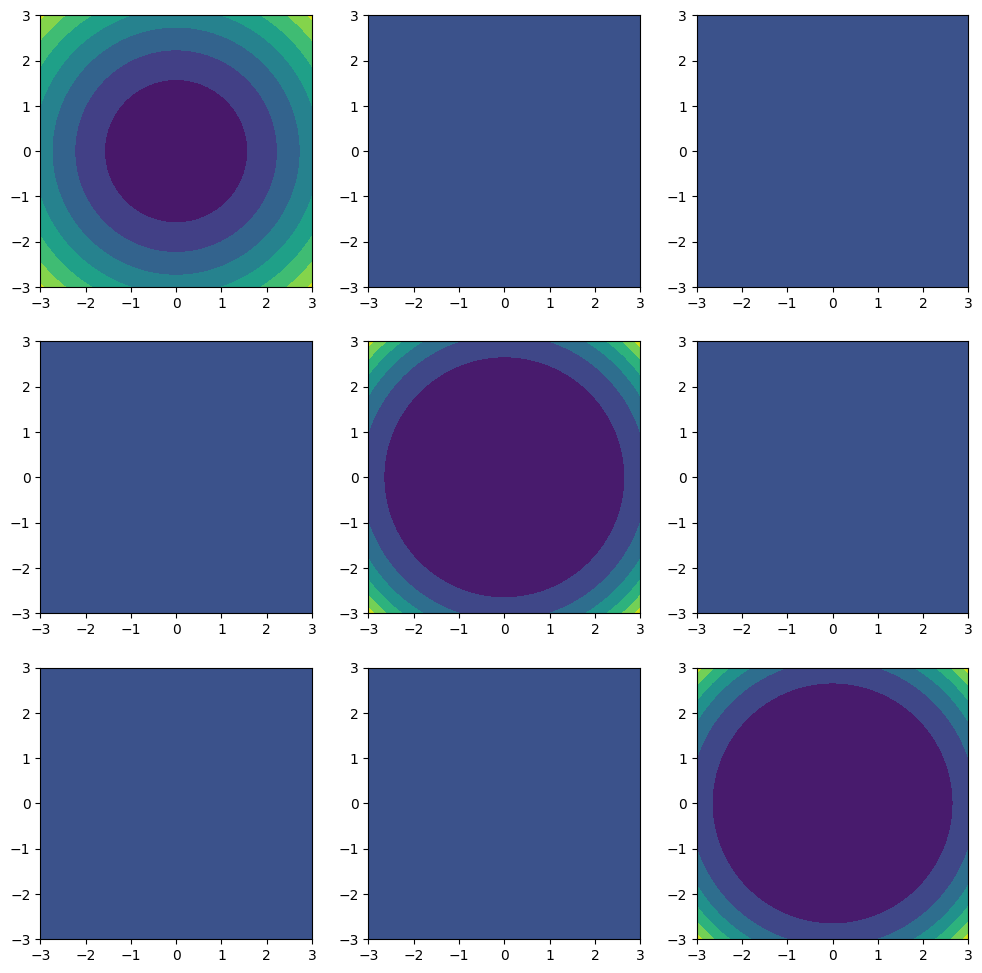

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_aspect('equal')
    ax.contourf(xg, yg, E_comps[i])

In [15]:
vector1 = sp.Matrix([[r_cart, theta_cart, phi_cart]])
vector2 = sp.Matrix([[x],[y],[z]])

J = vector1.jacobian(vector2)
J

Matrix([
[                                                            x/(sigma*sqrt(x**2/sigma + y**2/sigma + z**2/sigma)),                                                             y/(sigma*sqrt(x**2/sigma + y**2/sigma + z**2/sigma)),                                                                                                                z/(sigma*sqrt(x**2/sigma + y**2/sigma + z**2/sigma))],
[x*z/(sigma*sqrt(-z**2/(x**2/sigma + y**2/sigma + z**2/sigma) + 1)*(x**2/sigma + y**2/sigma + z**2/sigma)**(3/2)), y*z/(sigma*sqrt(-z**2/(x**2/sigma + y**2/sigma + z**2/sigma) + 1)*(x**2/sigma + y**2/sigma + z**2/sigma)**(3/2)), -(1/sqrt(x**2/sigma + y**2/sigma + z**2/sigma) - z**2/(sigma*(x**2/sigma + y**2/sigma + z**2/sigma)**(3/2)))/sqrt(-z**2/(x**2/sigma + y**2/sigma + z**2/sigma) + 1)],
[                                                                                       -y/(x**2*(1 + y**2/x**2)),                                                                                       

In [16]:
J = sp.expand(J, combine='all', force=True)
J = sp.cancel(J)
J = collect_sqrt(J)
J = sp.powsimp(J)
J = sp.combsimp(J)
J = sp.simplify(sp.separatevars(J))
J


Matrix([
[                                     x/(sqrt(sigma)*sqrt(x**2 + y**2 + z**2)),                                      y/(sqrt(sigma)*sqrt(x**2 + y**2 + z**2)),                                                 z/(sqrt(sigma)*sqrt(x**2 + y**2 + z**2))],
[sqrt(sigma)*x*z/((x**2 + y**2 + z**2)*sqrt(-sigma*z**2 + x**2 + y**2 + z**2)), sqrt(sigma)*y*z/((x**2 + y**2 + z**2)*sqrt(-sigma*z**2 + x**2 + y**2 + z**2)), sqrt(sigma)*(-x**2 - y**2)/((x**2 + y**2 + z**2)*sqrt(-sigma*z**2 + x**2 + y**2 + z**2))],
[                                                             -y/(x**2 + y**2),                                                               x/(x**2 + y**2),                                                                                        0]])

In [17]:
gij_sph_xyz = gij_sph.subs(r,r_cart)
gij_sph_xyz = sp.simplify(gij_sph_xyz.subs(theta,theta_cart))
gij_sph_xyz

Matrix([
[1,                          0,                                                                                                                          0],
[0, (x**2 + y**2 + z**2)/sigma,                                                                                                                          0],
[0,                          0, sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4)/sigma]])

In [18]:
gij_sph_xyz = sp.expand(gij_sph_xyz, combine='all', force=True)
gij_sph_xyz = sp.cancel(gij_sph_xyz)
gij_sph_xyz = collect_sqrt(gij_sph_xyz)
gij_sph_xyz = sp.powsimp(gij_sph_xyz)
gij_sph_xyz = sp.combsimp(gij_sph_xyz)
gij_sph_xyz = sp.simplify(sp.separatevars(gij_sph_xyz))
gij_sph_xyz

Matrix([
[1,                          0,                                                                                                                          0],
[0, (x**2 + y**2 + z**2)/sigma,                                                                                                                          0],
[0,                          0, sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4)/sigma]])

In [19]:
gij_cart = sp.simplify(sp.Inverse(J)*gij_sph_xyz*sp.Transpose(sp.Inverse(J)))
#gij_cart = sp.simplify(sp.Transpose(J)*gij_sph_xyz*J)

In [20]:
gij_cart

Matrix([
[(sigma**3*x**2*(x**2 + y**2)**2 + sigma*y**2*(x**2 + y**2)**2*(x**2 + y**2 + z**2)*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) + x**2*z**2*(x**2 + y**2 + z**2)**2*(-sigma*z**2 + x**2 + y**2 + z**2))/(sigma**2*(x**2 + y**2)**2*(x**2 + y**2 + z**2)),            x*y*(sigma**3*(x**2 + y**2)**2 - sigma*(x**2 + y**2)**2*(x**2 + y**2 + z**2)*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) + z**2*(x**2 + y**2 + z**2)**2*(-sigma*z**2 + x**2 + y**2 + z**2))/(sigma**2*(x**2 + y**2)**2*(x**2 + y**2 + z**2)), x*z*(sigma**3*(x**2 + y**2) - (x**2 + y**2 + z**2)**2*(-sigma*z**2 + x**2 + y**2 + z**2))/(sigma**2*(x**2 + y**2)*(x**2 + y**2 + z**2))],
[           x*y*(sigma**3*(x**2 + y**2)**2 - sigma*(x**2 + y**2)**2*(x**2 + y**2 + z**2)*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) + 

In [21]:
gij_cart = sp.expand(gij_cart, combine='all', force=True)
gij_cart = sp.cancel(gij_cart)
gij_cart = collect_sqrt(gij_cart)
gij_cart = sp.powsimp(gij_cart)
gij_cart = sp.combsimp(gij_cart)
gij_cart = sp.simplify(sp.separatevars(gij_cart))
gij_cart

Matrix([
[(sigma**3*x**6 + 2*sigma**3*x**4*y**2 + sigma**3*x**2*y**4 + sigma*x**6*y**2*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - sigma*x**6*z**4 + 3*sigma*x**4*y**4*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - 2*sigma*x**4*y**2*z**4 + sigma*x**4*y**2*z**2*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - 2*sigma*x**4*z**6 + 3*sigma*x**2*y**6*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - sigma*x**2*y**4*z**4 + 2*sigma*x**2*y**4*z**2*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - 2*sigma*x**2*y**2*z**6 - sigma*x**2*z**8 + sigma*y**8*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2

In [22]:
gij_cart = sp.simplify(sp.cancel(gij_cart))
gij_cart

Matrix([
[(sigma**3*x**6 + 2*sigma**3*x**4*y**2 + sigma**3*x**2*y**4 + sigma*x**6*y**2*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - sigma*x**6*z**4 + 3*sigma*x**4*y**4*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - 2*sigma*x**4*y**2*z**4 + sigma*x**4*y**2*z**2*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - 2*sigma*x**4*z**6 + 3*sigma*x**2*y**6*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - sigma*x**2*y**4*z**4 + 2*sigma*x**2*y**4*z**2*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - 2*sigma*x**2*y**2*z**6 - sigma*x**2*z**8 + sigma*y**8*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2

In [23]:
A = sp.Matrix(3, 3, sp.symbols('A:3:3'))
A

Matrix([
[A00, A01, A02],
[A10, A11, A12],
[A20, A21, A22]])

In [24]:
A.det()

A00*A11*A22 - A00*A12*A21 - A01*A10*A22 + A01*A12*A20 + A02*A10*A21 - A02*A11*A20

In [25]:
det_gij_cart = A.det().subs(zip(list(A), list(gij_cart)))
det_gij_cart

2*x**2*y**2*z**2*(sigma**3*x**2 + sigma**3*y**2 + sigma*x**4*z**2 + 2*sigma*x**2*y**2*z**2 + 2*sigma*x**2*z**4 + sigma*y**4*z**2 + 2*sigma*y**2*z**4 + sigma*z**6 - x**6 - 3*x**4*y**2 - 3*x**4*z**2 - 3*x**2*y**4 - 6*x**2*y**2*z**2 - 3*x**2*z**4 - y**6 - 3*y**4*z**2 - 3*y**2*z**4 - z**6)**2*(sigma**3*x**4 + 2*sigma**3*x**2*y**2 + sigma**3*y**4 - sigma*x**6*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - 3*sigma*x**4*y**2*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - sigma*x**4*z**4 - sigma*x**4*z**2*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - 3*sigma*x**2*y**4*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4) - 2*sigma*x**2*y**2*z**4 - 2*sigma*x**2*y**2*z**2*sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z

In [26]:
det_gij_cart = sp.simplify(sp.cancel(det_gij_cart))
det_gij_cart

sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4)*(-sigma*x**4*z**2 - 2*sigma*x**2*y**2*z**2 - 2*sigma*x**2*z**4 - sigma*y**4*z**2 - 2*sigma*y**2*z**4 - sigma*z**6 + x**6 + 3*x**4*y**2 + 3*x**4*z**2 + 3*x**2*y**4 + 6*x**2*y**2*z**2 + 3*x**2*z**4 + y**6 + 3*y**4*z**2 + 3*y**2*z**4 + z**6)/sigma**2

In [27]:
det_gij_cart

sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4)*(-sigma*x**4*z**2 - 2*sigma*x**2*y**2*z**2 - 2*sigma*x**2*z**4 - sigma*y**4*z**2 - 2*sigma*y**2*z**4 - sigma*z**6 + x**6 + 3*x**4*y**2 + 3*x**4*z**2 + 3*x**2*y**4 + 6*x**2*y**2*z**2 + 3*x**2*z**4 + y**6 + 3*y**4*z**2 + 3*y**2*z**4 + z**6)/sigma**2

In [28]:
det_gij_cart_sqrt = det_gij_cart**0.5

In [29]:
det_gij_cart_sqrt = sp.expand(det_gij_cart_sqrt)
det_gij_cart_sqrt = sp.cancel(det_gij_cart_sqrt)

In [30]:
det_gij_cart_sqrt = sp.simplify(det_gij_cart_sqrt)

In [31]:
det_gij_cart_sqrt = sp.powsimp(det_gij_cart_sqrt)

In [32]:
det_gij_cart_sqrt

(sqrt(-sigma*x**2*z**2 - sigma*y**2*z**2 - sigma*z**4 + x**4 + 2*x**2*y**2 + 2*x**2*z**2 + y**4 + 2*y**2*z**2 + z**4)*(-sigma*x**4*z**2 - 2*sigma*x**2*y**2*z**2 - 2*sigma*x**2*z**4 - sigma*y**4*z**2 - 2*sigma*y**2*z**4 - sigma*z**6 + x**6 + 3*x**4*y**2 + 3*x**4*z**2 + 3*x**2*y**4 + 6*x**2*y**2*z**2 + 3*x**2*z**4 + y**6 + 3*y**4*z**2 + 3*y**2*z**4 + z**6))**0.5/sigma**1.0

In [33]:
E = det_gij_cart_sqrt * gij_cart

In [34]:
E = sp.expand(E)

In [35]:
E = sp.simplify(sp.cancel(E))

In [36]:
E_num = E.subs(x, sp.symbols('(xg)'))
E_num = E_num.subs(y, sp.symbols('(yg)'))
E_num = E_num.subs(z, sp.symbols('(zg)'))
E_num = E_num.subs(s, sp.symbols('(sg)'))

In [37]:
E_num[0,0]

(sqrt(-(sg)*(xg)**2*(zg)**2 - (sg)*(yg)**2*(zg)**2 - (sg)*(zg)**4 + (xg)**4 + 2*(xg)**2*(yg)**2 + 2*(xg)**2*(zg)**2 + (yg)**4 + 2*(yg)**2*(zg)**2 + (zg)**4)*(-(sg)*(xg)**4*(zg)**2 - 2*(sg)*(xg)**2*(yg)**2*(zg)**2 - 2*(sg)*(xg)**2*(zg)**4 - (sg)*(yg)**4*(zg)**2 - 2*(sg)*(yg)**2*(zg)**4 - (sg)*(zg)**6 + (xg)**6 + 3*(xg)**4*(yg)**2 + 3*(xg)**4*(zg)**2 + 3*(xg)**2*(yg)**4 + 6*(xg)**2*(yg)**2*(zg)**2 + 3*(xg)**2*(zg)**4 + (yg)**6 + 3*(yg)**4*(zg)**2 + 3*(yg)**2*(zg)**4 + (zg)**6))**0.5*((sg)**2.0*(xg)**8*(zg)**2 + 3*(sg)**2.0*(xg)**6*(yg)**2*(zg)**2 + 3*(sg)**2.0*(xg)**6*(zg)**4 + 3*(sg)**2.0*(xg)**4*(yg)**4*(zg)**2 + 6*(sg)**2.0*(xg)**4*(yg)**2*(zg)**4 + 3*(sg)**2.0*(xg)**4*(zg)**6 + (sg)**2.0*(xg)**2*(yg)**6*(zg)**2 + 3*(sg)**2.0*(xg)**2*(yg)**4*(zg)**4 + 3*(sg)**2.0*(xg)**2*(yg)**2*(zg)**6 + (sg)**2.0*(xg)**2*(zg)**8 + (sg)**3.0*(xg)**6*(yg)**2*sqrt(-(sg)*(xg)**2*(zg)**2 - (sg)*(yg)**2*(zg)**2 - (sg)*(zg)**4 + (xg)**4 + 2*(xg)**2*(yg)**2 + 2*(xg)**2*(zg)**2 + (yg)**4 + 2*(yg)**2*(zg)**2 

In [38]:
E_comps = []

for i in range(3):
    for j in range(3):
        elem = eval(str(E_num[i,j]))
        if type(elem)==int:
                  elem = np.zeros((400,400))
        E_comps.append(elem)
        print('done comp: [{},{}]'.format(i,j))

done comp: [0,0]
done comp: [0,1]
done comp: [0,2]
done comp: [1,0]
done comp: [1,1]
done comp: [1,2]
done comp: [2,0]
done comp: [2,1]
done comp: [2,2]


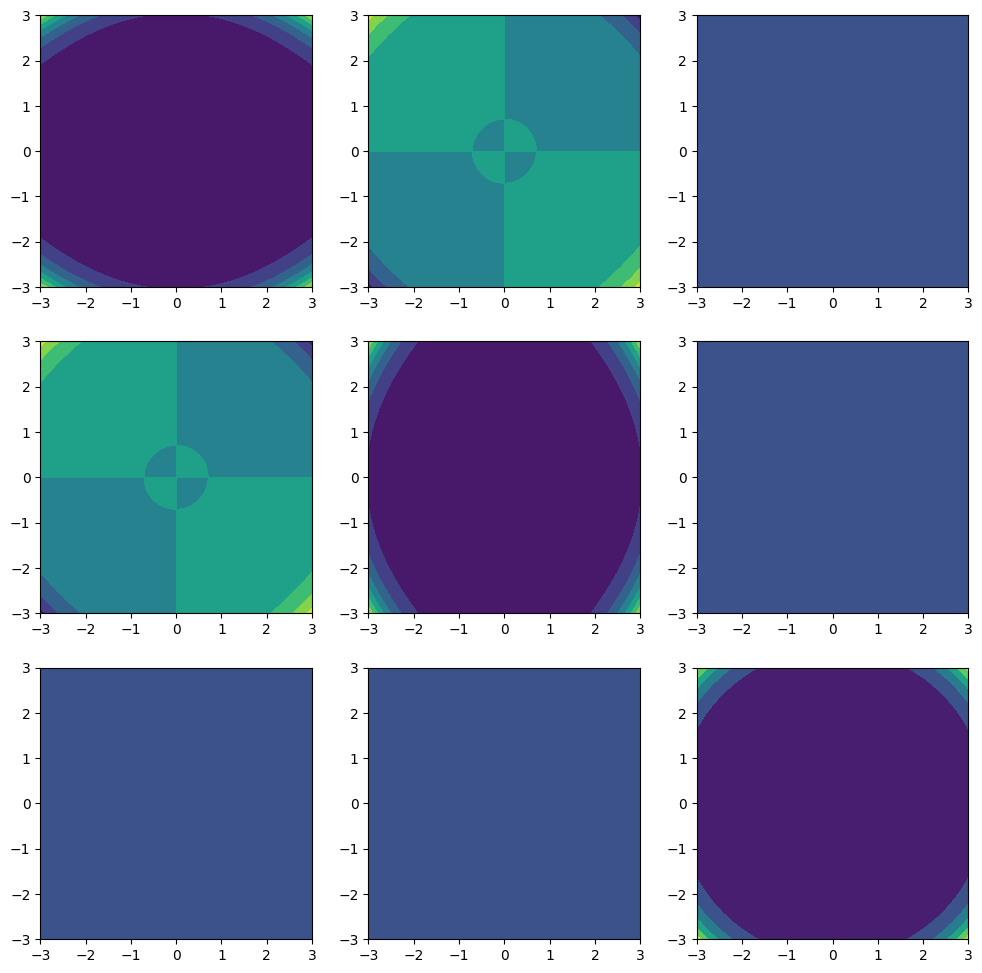

In [39]:
fig = plt.figure(figsize=(12,12))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_aspect('equal')
    ax.contourf(xg, yg, E_comps[i])